In [1]:
#Importing libraries
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses 
from PIL import Image

In [10]:
input_size = (299, 299)
dataset_directory = 'dataset'

images = []
labels = []

for class_name in os.listdir(dataset_directory):
    class_directory = os.path.join(dataset_directory, class_name)
    
    if os.path.isdir(class_directory):
        for image_filename in os.listdir(class_directory):
            image_path = os.path.join(class_directory, image_filename)
            
            image = cv2.imread(image_path)
            
            if image is not None:
                image = cv2.resize(image, input_size)
                images.append(image)
                labels.append(class_name)

x = np.array(images)
y = np.array(labels)

print("Shape of images array:", x.shape)
print("Shape of labels array:", y.shape)


Shape of images array: (253, 299, 299, 3)
Shape of labels array: (253,)


In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=101,test_size=0.2)

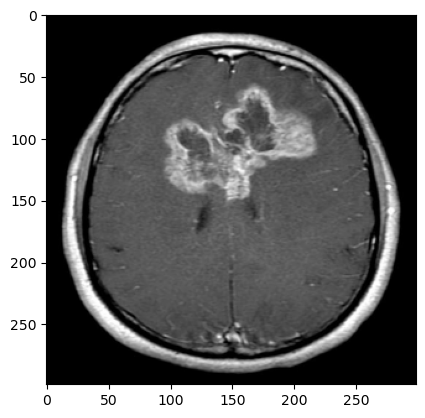

In [15]:
plt.imshow(xtrain[10])

In [16]:
ytrain[10]

'1'

In [17]:
ytrain[0]

'0'

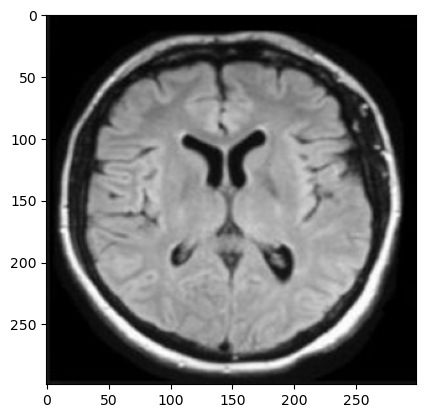

In [18]:
plt.imshow(xtrain[0])

In [20]:
base = tf.keras.applications.inception_v3.InceptionV3(input_shape=(299,299,3))

In [24]:
headModel = base.output
headModel = tf.keras.layers.Flatten()(headModel)
headModel = tf.keras.layers.Dense(256, activation='relu', name='fc1',)(headModel)
headModel = tf.keras.layers.Dense(256, activation='relu', name='fc2',)(headModel)
headModel = tf.keras.layers.Dense(1,activation='sigmoid', name='fc3',)(headModel)

In [25]:
xtraining,xval,ytraining,yval = train_test_split(xtrain,ytrain,random_state=101,test_size=0.2)

In [28]:
model = tf.keras.Model(inputs=base.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 149, 149, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                             

In [30]:
for layer in base.layers:
    layer.trainable = False

In [31]:
for layer in model.layers:
    print(f"{layer}: {layer.trainable}\n")

<keras.engine.input_layer.InputLayer object at 0x000002404FAB44C0>: False

<keras.layers.convolutional.conv2d.Conv2D object at 0x000002404FABEFD0>: False

<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002404FB69130>: False

<keras.layers.core.activation.Activation object at 0x000002402F0140A0>: False

<keras.layers.convolutional.conv2d.Conv2D object at 0x000002404FB32EB0>: False

<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002404FB6BBB0>: False

<keras.layers.core.activation.Activation object at 0x000002403016F640>: False

<keras.layers.convolutional.conv2d.Conv2D object at 0x00000240564CA0A0>: False

<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000240564C8CA0>: False

<keras.layers.core.activation.Activation object at 0x000002404355F190>: False

<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002404FB6B520>: False

<keras.layers.convolutional.conv2d.Conv2D obje

In [32]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [35]:
ytrain = ytrain.astype(int)
ytrain

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [39]:
ytest = ytest.astype(int)
yval = yval.astype(int)
ytraining = ytraining.astype(int)

In [40]:
H = model.fit(xtraining,ytraining,epochs=100,verbose=1,validation_data=(xval,yval))

Epoch 1/100
6/6 [==============================] - 6s 998ms/step - loss: 0.5834 - accuracy: 0.7329 - val_loss: 0.5450 - val_accuracy: 0.7561
Epoch 2/100
6/6 [==============================] - 6s 1s/step - loss: 0.5762 - accuracy: 0.7453 - val_loss: 0.5354 - val_accuracy: 0.7561
Epoch 3/100
6/6 [==============================] - 3s 323ms/step - loss: 0.5683 - accuracy: 0.7453 - val_loss: 0.5317 - val_accuracy: 0.7561
Epoch 4/100
6/6 [==============================] - 1s 145ms/step - loss: 0.5714 - accuracy: 0.7453 - val_loss: 0.5299 - val_accuracy: 0.7561
Epoch 5/100
6/6 [==============================] - 1s 144ms/step - loss: 0.5691 - accuracy: 0.7391 - val_loss: 0.5356 - val_accuracy: 0.7561
Epoch 6/100
6/6 [==============================] - 1s 139ms/step - loss: 0.5666 - accuracy: 0.7453 - val_loss: 0.5315 - val_accuracy: 0.7561
Epoch 7/100
6/6 [==============================] - 1s 136ms/step - loss: 0.5624 - accuracy: 0.7391 - val_loss: 0.5213 - val_accuracy: 0.7561
Epoch 8/100
6/6 

In [42]:
H

In [43]:
ypreds = model.predict(xtest)

2/2 [==============================] - 4s 465ms/step


In [45]:
ypredictions = ypreds

In [46]:
ypreds[ypreds > 0.5] = 1
ypreds[ypreds <= 0.5] = 0

In [48]:
ytest

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0])

In [49]:
accuracy_score(ytest,ypreds)

0.7647058823529411

In [59]:
precision_score(ytest,ypreds)

0.7714285714285715

In [60]:
recall_score(ytest,ypreds)

0.8709677419354839

In [61]:
ytest[0]

1

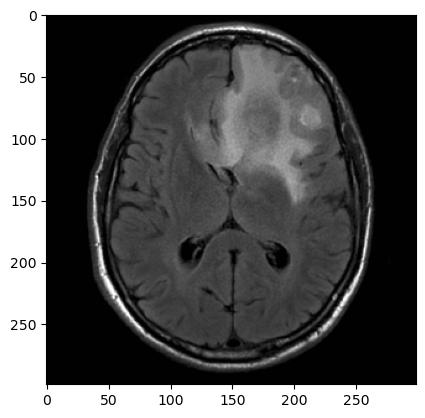

In [62]:
plt.imshow(xtest[0])

In [63]:
ypreds[0]

array([0.], dtype=float32)

In [66]:
def show(index):
    if ytest[index]==0:
        print("The patient does not have a  tumor")
    else:
        print("The patient has brain tumor")
        
    if ypreds[index]==0:
        print("The model predicted that the patient does not have a brain tumor")
    else:
        print("The model predicted that the patient haa a brain tumor")
        
    plt.imshow(xtest[index])

The patient has brain tumor
The model predicted that the patient haa a brain tumor


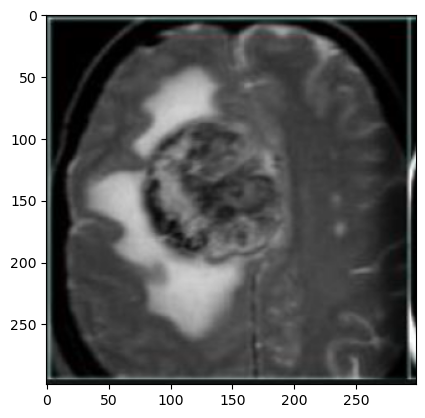

In [67]:
show(5)

The patient has brain tumor
The model predicted that the patient haa a brain tumor


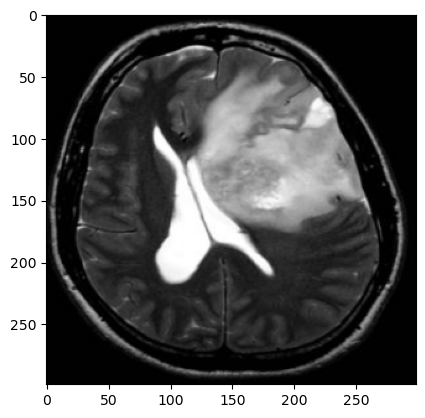

In [69]:
show(7)